<a href="https://colab.research.google.com/github/Hem143/WT-CLA---1/blob/main/yolo_v8_final_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install ultralytics


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 755.5/755.5 kB 6.7 MB/s eta 0:00:00
  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (23.7 MB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (823 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (14.1 MB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl (731.7 MB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl (410.6 MB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl (121.6 MB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl (56.5 MB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.whl (124.2 MB)
  Using cached nvidia_cusparse_cu12-12.1.0.106-py3-none-manylinux1_x86_64.whl (196.0 MB)
  Using cached nvidia_nccl_cu12-2.19.3-py3-none-manylinux1_x86_64.whl (166.0 MB)
  Using cached nvidia_nvtx_cu12-12.1.105-py3-none-many

In [2]:
from ultralytics import YOLO

In [3]:
model = YOLO("yolov8m.pt")

100%|██████████| 49.7M/49.7M [00:00<00:00, 185MB/s]


In [6]:
results = model.predict("/content/IMG_20240501_121450_Burst09.jpg")


image 1/1 /content/IMG_20240501_121450_Burst09.jpg: 320x640 10 persons, 961.0ms
Speed: 17.4ms preprocess, 961.0ms inference, 2733.3ms postprocess per image at shape (1, 3, 320, 640)


In [7]:
result = results[0]
print(len(result.boxes))

10


In [8]:
for box in result.boxes:
    label = result.names[box.cls[0].item()]
    coords = {round(x) for x in box.xyxy[0].tolist()}
    probs = box.conf[0].item()
    print("object type:", label )
    print("coordinates:", coords )
    print("probability:", probs)

object type: person
coordinates: {2080, 1521, 1858, 1150}
probability: 0.9251978397369385
object type: person
coordinates: {297, 1492, 1813, 1006}
probability: 0.9179644584655762
object type: person
coordinates: {1858, 3069, 2670, 375}
probability: 0.9078234434127808
object type: person
coordinates: {281, 1411, 1678, 2097}
probability: 0.901759147644043
object type: person
coordinates: {2312, 1858, 1004, 2845}
probability: 0.899804949760437
object type: person
coordinates: {2354, 1258, 2782, 354}
probability: 0.8971643447875977
object type: person
coordinates: {1207, 2410, 1858, 1799}
probability: 0.8716431260108948
object type: person
coordinates: {2000, 2395, 395, 1428}
probability: 0.8710578083992004
object type: person
coordinates: {1721, 1379, 196, 1878}
probability: 0.3725973665714264
object type: person
coordinates: {1104, 194, 1718, 2087}
probability: 0.3454216420650482


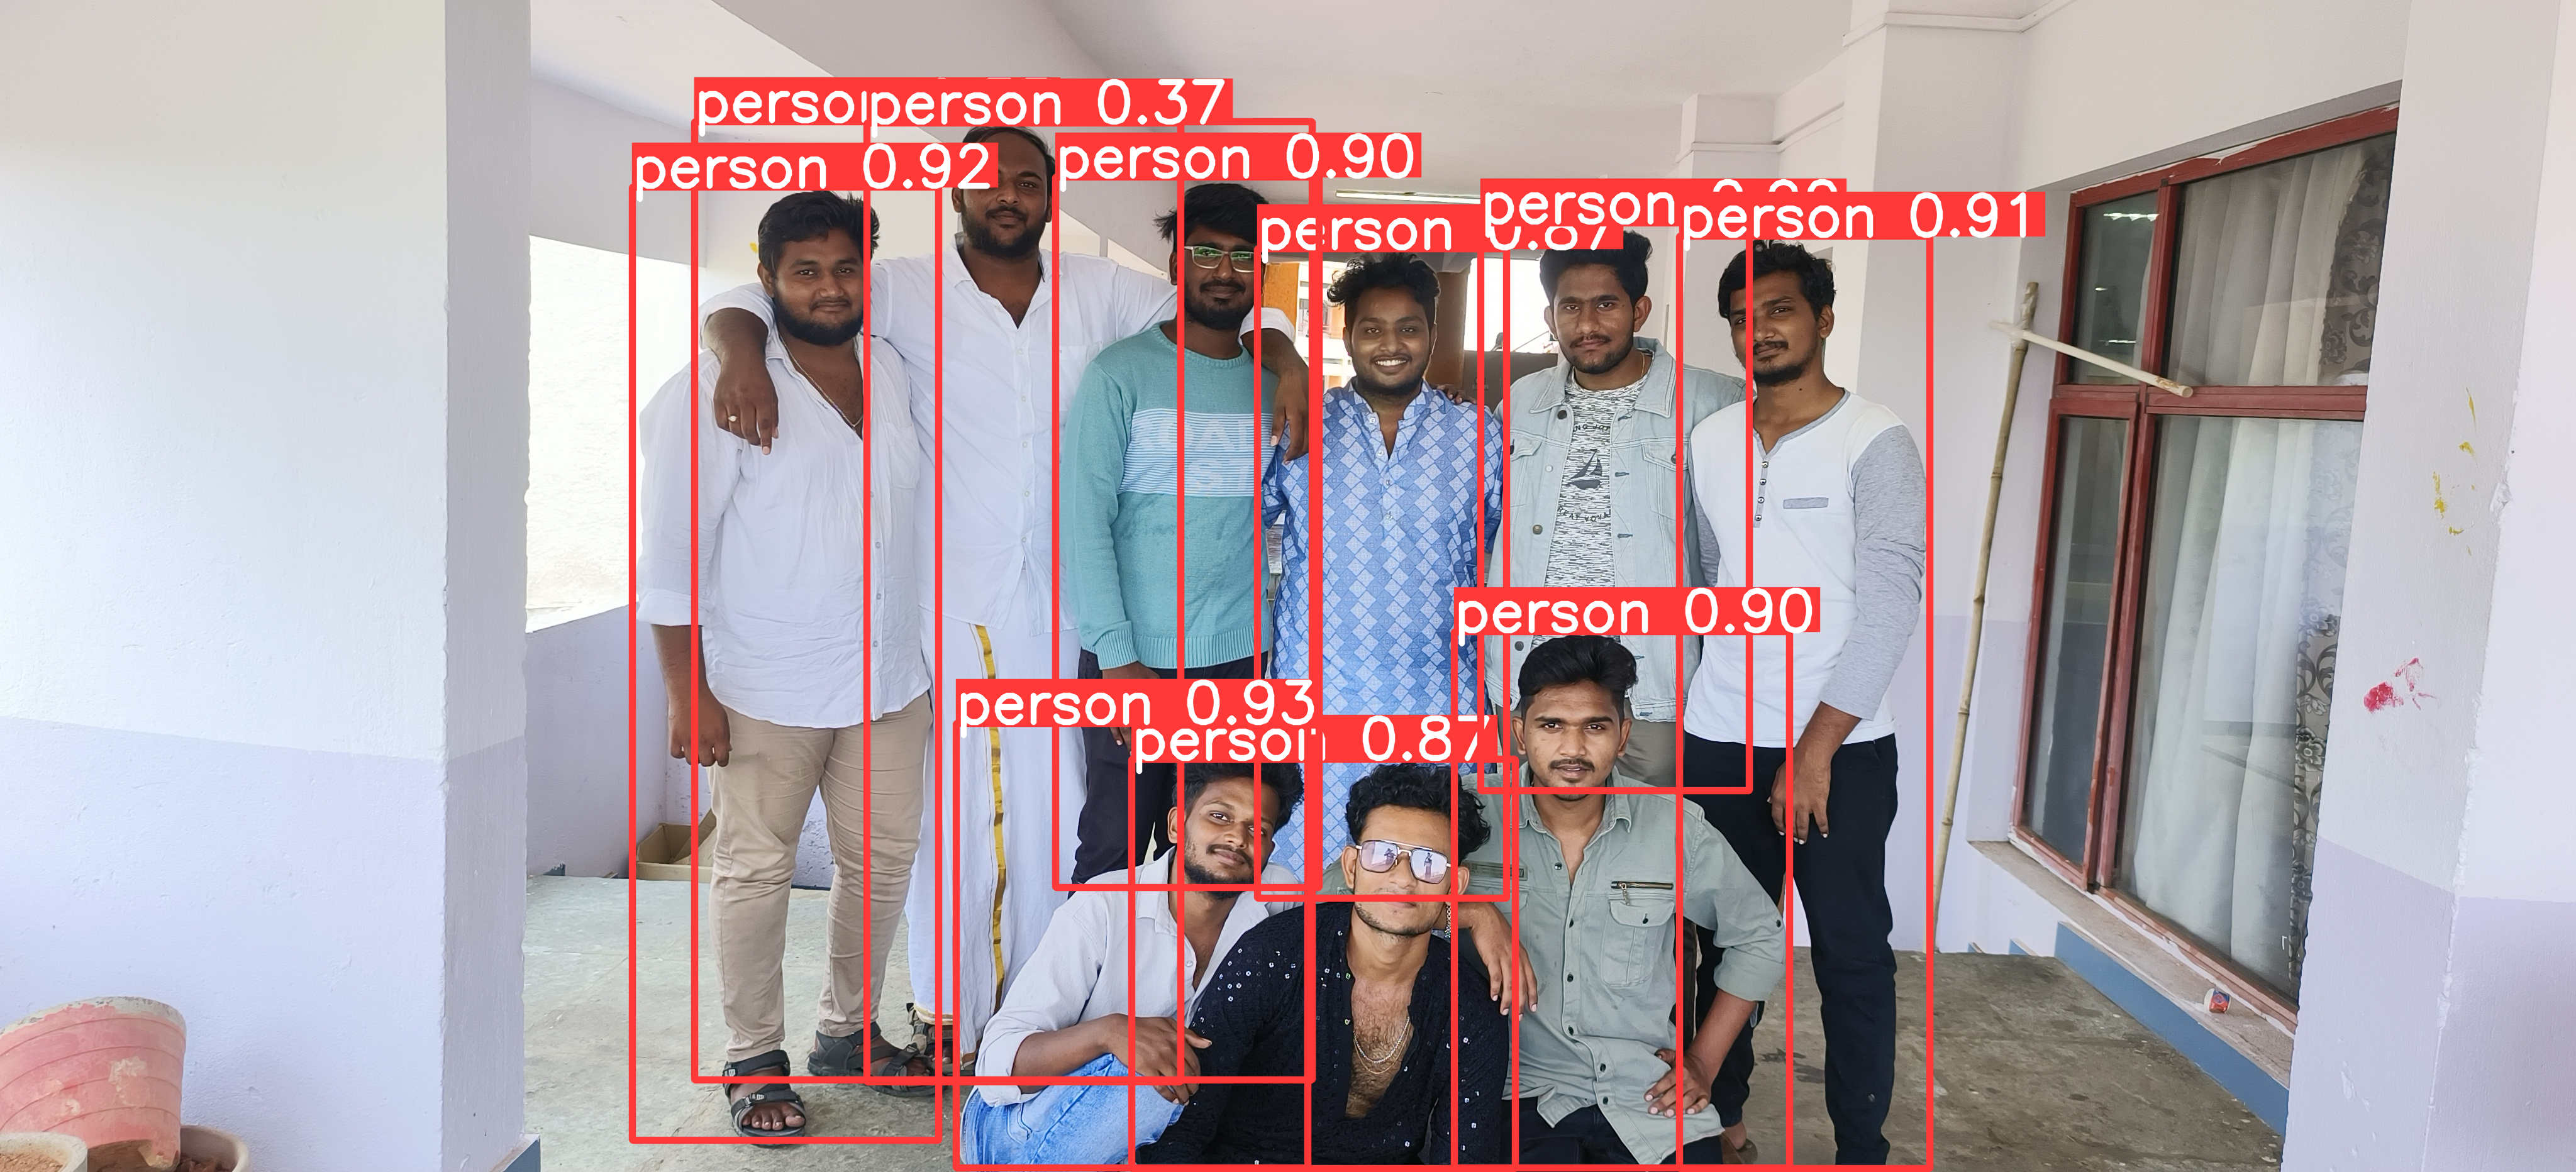

In [9]:
from PIL import Image
Image.fromarray(result.plot()[:,:,::-1])

In [11]:
# Load YOLOv8n, train it on COCO128 for 3 epochs and predict an image with it
from ultralytics import YOLO

model = YOLO('yolov8n.pt')  # load a pretrained YOLOv8n detection model
model.train(data='coco128.yaml', epochs=3)  # train the model
model('https://ultralytics.com/images/content/IMG_20240501_121450_Burst09.jpg')  # predict on an image

Ultralytics YOLOv8.2.9 🚀 Python-3.10.12 torch-2.2.1+cu121 CPU (Intel Xeon 2.20GHz)
engine/trainer: task=detect, mode=train, model=yolov8n.pt, data=coco128.yaml, epochs=3, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train2, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, show_boxes=True, line_w

train: Scanning /content/datasets/coco128/labels/train2017.cache... 126 images, 2 backgrounds, 0 corrupt: 100%|██████████| 128/128 [00:00<?, ?it/s]

albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))



val: Scanning /content/datasets/coco128/labels/train2017.cache... 126 images, 2 backgrounds, 0 corrupt: 100%|██████████| 128/128 [00:00<?, ?it/s]

Plotting labels to runs/detect/train2/labels.jpg... 


optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.000119, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 0 dataloader workers
Logging results to runs/detect/train2
Starting training for 3 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        1/3         0G      1.155      1.494      1.217        215        640: 100%|██████████| 8/8 [02:15<00:00, 17.00s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:47<00:00, 11.96s/it]

                   all        128        929      0.661      0.534      0.618      0.459



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        2/3         0G       1.23      1.416      1.268        245        640: 100%|██████████| 8/8 [02:06<00:00, 15.83s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:41<00:00, 10.38s/it]

                   all        128        929      0.671      0.552      0.629       0.47



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        3/3         0G      1.141      1.352      1.221        280        640: 100%|██████████| 8/8 [01:59<00:00, 14.91s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:39<00:00,  9.96s/it]

                   all        128        929      0.681      0.554      0.633      0.474



3 epochs completed in 0.145 hours.
Optimizer stripped from runs/detect/train2/weights/last.pt, 6.5MB
Optimizer stripped from runs/detect/train2/weights/best.pt, 6.5MB

Validating runs/detect/train2/weights/best.pt...
Ultralytics YOLOv8.2.9 🚀 Python-3.10.12 torch-2.2.1+cu121 CPU (Intel Xeon 2.20GHz)
Model summary (fused): 168 layers, 3151904 parameters, 0 gradients, 8.7 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:36<00:00,  9.06s/it]


                   all        128        929      0.682      0.554      0.634      0.474
                person        128        254      0.825      0.657      0.773      0.541
               bicycle        128          6      0.495      0.333      0.327      0.282
                   car        128         46      0.893      0.217      0.281      0.185
            motorcycle        128          5      0.673      0.827      0.938      0.742
              airplane        128          6      0.813      0.833      0.927      0.717
                   bus        128          7       0.74      0.714      0.729      0.657
                 train        128          3       0.56      0.667      0.775      0.687
                 truck        128         12          1      0.367      0.512      0.341
                  boat        128          6      0.408      0.241       0.42      0.283
         traffic light        128         14      0.744      0.209      0.201      0.138
             stop sig

[ultralytics.engine.results.Results object with attributes:
 
 boxes: ultralytics.engine.results.Boxes object
 keypoints: None
 masks: None
 names: {0: 'person', 1: 'bicycle', 2: 'car', 3: 'motorcycle', 4: 'airplane', 5: 'bus', 6: 'train', 7: 'truck', 8: 'boat', 9: 'traffic light', 10: 'fire hydrant', 11: 'stop sign', 12: 'parking meter', 13: 'bench', 14: 'bird', 15: 'cat', 16: 'dog', 17: 'horse', 18: 'sheep', 19: 'cow', 20: 'elephant', 21: 'bear', 22: 'zebra', 23: 'giraffe', 24: 'backpack', 25: 'umbrella', 26: 'handbag', 27: 'tie', 28: 'suitcase', 29: 'frisbee', 30: 'skis', 31: 'snowboard', 32: 'sports ball', 33: 'kite', 34: 'baseball bat', 35: 'baseball glove', 36: 'skateboard', 37: 'surfboard', 38: 'tennis racket', 39: 'bottle', 40: 'wine glass', 41: 'cup', 42: 'fork', 43: 'knife', 44: 'spoon', 45: 'bowl', 46: 'banana', 47: 'apple', 48: 'sandwich', 49: 'orange', 50: 'broccoli', 51: 'carrot', 52: 'hot dog', 53: 'pizza', 54: 'donut', 55: 'cake', 56: 'chair', 57: 'couch', 58: 'potted p

In [14]:
# Load YOLOv8n-seg, train it on COCO128-seg for 3 epochs and predict an image with it
from ultralytics import YOLO

model = YOLO('yolov8n-seg.pt')  # load a pretrained YOLOv8n segmentation model
model.train(data='coco128-seg.yaml', epochs=3)  # train the model
model('https://ultralytics.com/images/content/IMG_20240501_121450_Burst09.jpg')  # predict on an image

100%|██████████| 6.73M/6.73M [00:00<00:00, 83.2MB/s]


Ultralytics YOLOv8.2.9 🚀 Python-3.10.12 torch-2.2.1+cu121 CPU (Intel Xeon 2.20GHz)
engine/trainer: task=segment, mode=train, model=yolov8n-seg.pt, data=coco128-seg.yaml, epochs=3, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, show_boxes=True

100%|██████████| 6.79M/6.79M [00:00<00:00, 83.1MB/s]
Unzipping /content/datasets/coco128-seg.zip to /content/datasets/coco128-seg...: 100%|██████████| 263/263 [00:00<00:00, 2914.97file/s]

Dataset download success ✅ (1.1s), saved to /content/datasets


                   from  n    params  module                                       arguments                     


  0                  -1  1       464  ultralytics.nn.modules.conv.Conv             [3, 16, 3, 2]                 
  1                  -1  1      4672  ultralytics.nn.modules.conv.Conv             [16, 32, 3, 2]                
  2                  -1  1      7360  ultralytics.nn.modules.block.C2f             [32, 32, 1, True]             
  3                  -1  1     18560  ultralytics.nn.modules.conv.Conv             [32, 64, 3, 2]                
  4                  -1  2     49664  ultralytics.nn.modules.block.C2f             [64, 64, 2, True]             
  5                  -1  1     73984  ultralytics.nn.modules.conv.Conv             [64, 128, 3, 2]               
  6                  -1  2    197632  ultralytics.nn.modules.block.C2f             [128, 128, 2, True]           
  7                  -1  1    295424  ultralytics.nn.modules.conv.Conv             [128, 256, 3, 2]              
  8                  -1  1    460288  ultralytics.nn.modules.block.C2f             [256,

train: Scanning /content/datasets/coco128-seg/labels/train2017... 126 images, 2 backgrounds, 0 corrupt: 100%|██████████| 128/128 [00:00<00:00, 1372.50it/s]

train: New cache created: /content/datasets/coco128-seg/labels/train2017.cache
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))



val: Scanning /content/datasets/coco128-seg/labels/train2017.cache... 126 images, 2 backgrounds, 0 corrupt: 100%|██████████| 128/128 [00:00<?, ?it/s]

Plotting labels to runs/segment/train/labels.jpg... 


optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.000119, momentum=0.9) with parameter groups 66 weight(decay=0.0), 77 weight(decay=0.0005), 76 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 0 dataloader workers
Logging results to runs/segment/train
Starting training for 3 epochs...

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


        1/3         0G      1.096      2.595       1.53      1.148        221        640: 100%|██████████| 8/8 [03:03<00:00, 23.00s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [01:01<00:00, 15.38s/it]


                   all        128        929      0.581      0.572       0.59      0.441      0.556       0.54      0.554      0.365

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


        2/3         0G      1.155      2.655      1.396      1.178        250        640: 100%|██████████| 8/8 [02:52<00:00, 21.50s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [01:02<00:00, 15.61s/it]

                   all        128        929      0.599       0.57      0.605       0.45      0.562      0.541      0.565      0.371



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


        3/3         0G      1.056      2.549       1.36      1.149        143        640: 100%|██████████| 8/8 [02:49<00:00, 21.16s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [01:08<00:00, 17.18s/it]

                   all        128        929      0.596      0.594      0.611      0.454      0.562      0.562      0.569      0.374



3 epochs completed in 0.203 hours.
Optimizer stripped from runs/segment/train/weights/last.pt, 7.1MB
Optimizer stripped from runs/segment/train/weights/best.pt, 7.1MB

Validating runs/segment/train/weights/best.pt...
Ultralytics YOLOv8.2.9 🚀 Python-3.10.12 torch-2.2.1+cu121 CPU (Intel Xeon 2.20GHz)
YOLOv8n-seg summary (fused): 195 layers, 3404320 parameters, 0 gradients, 12.6 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:58<00:00, 14.57s/it]


                   all        128        929      0.595      0.595      0.611      0.455      0.562      0.563      0.569      0.375
                person        128        254      0.792      0.707      0.782      0.552      0.757      0.675      0.737        0.4
               bicycle        128          6       0.45      0.333      0.388      0.215       0.32      0.244       0.27       0.18
                   car        128         46      0.516      0.209      0.272      0.154      0.515      0.208      0.245      0.104
            motorcycle        128          5      0.877          1      0.995      0.815      0.881          1      0.995      0.584
              airplane        128          6      0.659      0.833      0.931       0.75      0.659      0.833      0.903      0.568
                   bus        128          7      0.643      0.714      0.727      0.621      0.644      0.714      0.721      0.601
                 train        128          3      0.425      0.667   

[ultralytics.engine.results.Results object with attributes:
 
 boxes: ultralytics.engine.results.Boxes object
 keypoints: None
 masks: ultralytics.engine.results.Masks object
 names: {0: 'person', 1: 'bicycle', 2: 'car', 3: 'motorcycle', 4: 'airplane', 5: 'bus', 6: 'train', 7: 'truck', 8: 'boat', 9: 'traffic light', 10: 'fire hydrant', 11: 'stop sign', 12: 'parking meter', 13: 'bench', 14: 'bird', 15: 'cat', 16: 'dog', 17: 'horse', 18: 'sheep', 19: 'cow', 20: 'elephant', 21: 'bear', 22: 'zebra', 23: 'giraffe', 24: 'backpack', 25: 'umbrella', 26: 'handbag', 27: 'tie', 28: 'suitcase', 29: 'frisbee', 30: 'skis', 31: 'snowboard', 32: 'sports ball', 33: 'kite', 34: 'baseball bat', 35: 'baseball glove', 36: 'skateboard', 37: 'surfboard', 38: 'tennis racket', 39: 'bottle', 40: 'wine glass', 41: 'cup', 42: 'fork', 43: 'knife', 44: 'spoon', 45: 'bowl', 46: 'banana', 47: 'apple', 48: 'sandwich', 49: 'orange', 50: 'broccoli', 51: 'carrot', 52: 'hot dog', 53: 'pizza', 54: 'donut', 55: 'cake', 56: 

In [15]:
# Load YOLOv8n-cls, train it on mnist160 for 3 epochs and predict an image with it
from ultralytics import YOLO

model = YOLO('yolov8n-cls.pt')  # load a pretrained YOLOv8n classification model
model.train(data='mnist160', epochs=3)  # train the model
model('https://ultralytics.com/images/content/IMG_20240501_121450_Burst09.jpg')  # predict on an image

100%|██████████| 5.30M/5.30M [00:00<00:00, 67.2MB/s]


Ultralytics YOLOv8.2.9 🚀 Python-3.10.12 torch-2.2.1+cu121 CPU (Intel Xeon 2.20GHz)
engine/trainer: task=classify, mode=train, model=yolov8n-cls.pt, data=mnist160, epochs=3, time=None, patience=100, batch=16, imgsz=224, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, show_boxes=True, line_

100%|██████████| 70.0k/70.0k [00:00<00:00, 5.54MB/s]
Unzipping /content/datasets/mnist160.zip to /content/datasets/mnist160...: 100%|██████████| 184/184 [00:00<00:00, 5375.22file/s]

Dataset download success ✅ (0.5s), saved to /content/datasets/mnist160

train: /content/datasets/mnist160/train... found 80 images in 10 classes ✅ 
val: None...
test: /content/datasets/mnist160/test... found 80 images in 10 classes ✅ 
Overriding model.yaml nc=1000 with nc=10

                   from  n    params  module                                       arguments                     
  0                  -1  1       464  ultralytics.nn.modules.conv.Conv             [3, 16, 3, 2]                 
  1                  -1  1      4672  ultralytics.nn.modules.conv.Conv             [16, 32, 3, 2]                
  2                  -1  1      7360  ultralytics.nn.modules.block.C2f             [32, 32, 1, True]             
  3                  -1  1     18560  ultralytics.nn.modules.conv.Conv             [32, 64, 3, 2]                
  4                  -1  2     49664  ultralytics.nn.modules.block.C2f             [64, 64, 2, True]             
  5                  -1  1     73984  u

YOLOv8n-cls summary: 99 layers, 1451098 parameters, 1451098 gradients, 3.4 GFLOPs
Transferred 156/158 items from pretrained weights
TensorBoard: Start with 'tensorboard --logdir runs/classify/train', view at http://localhost:6006/


train: Scanning /content/datasets/mnist160/train... 80 images, 0 corrupt: 100%|██████████| 80/80 [00:00<00:00, 7339.92it/s]


train: New cache created: /content/datasets/mnist160/train.cache


val: Scanning /content/datasets/mnist160/test... 80 images, 0 corrupt: 100%|██████████| 80/80 [00:00<00:00, 35469.80it/s]

val: New cache created: /content/datasets/mnist160/test.cache
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.000714, momentum=0.9) with parameter groups 26 weight(decay=0.0), 27 weight(decay=0.0005), 27 bias(decay=0.0)


TensorBoard: model graph visualization added ✅
Image sizes 224 train, 224 val
Using 0 dataloader workers
Logging results to runs/classify/train
Starting training for 3 epochs...

      Epoch    GPU_mem       loss  Instances       Size


               classes   top1_acc   top5_acc: 100%|██████████| 3/3 [00:01<00:00,  2.05it/s]

                   all     0.0875      0.538



      Epoch    GPU_mem       loss  Instances       Size


               classes   top1_acc   top5_acc: 100%|██████████| 3/3 [00:01<00:00,  2.44it/s]

                   all     0.0625      0.613



      Epoch    GPU_mem       loss  Instances       Size


               classes   top1_acc   top5_acc: 100%|██████████| 3/3 [00:01<00:00,  1.96it/s]

                   all      0.112      0.613



3 epochs completed in 0.006 hours.
Optimizer stripped from runs/classify/train/weights/last.pt, 3.0MB
Optimizer stripped from runs/classify/train/weights/best.pt, 3.0MB

Validating runs/classify/train/weights/best.pt...
Ultralytics YOLOv8.2.9 🚀 Python-3.10.12 torch-2.2.1+cu121 CPU (Intel Xeon 2.20GHz)
YOLOv8n-cls summary (fused): 73 layers, 1447690 parameters, 0 gradients, 3.3 GFLOPs
WARNING ⚠️ Dataset 'split=val' not found, using 'split=test' instead.
train: /content/datasets/mnist160/train... found 80 images in 10 classes ✅ 
val: None...
test: /content/datasets/mnist160/test... found 80 images in 10 classes ✅ 


               classes   top1_acc   top5_acc: 100%|██████████| 3/3 [00:01<00:00,  1.86it/s]


                   all      0.112      0.587
Speed: 0.0ms preprocess, 12.4ms inference, 0.0ms loss, 0.0ms postprocess per image
Results saved to runs/classify/train
Results saved to runs/classify/train

Found https://ultralytics.com/images/content/IMG_20240501_121450_Burst09.jpg locally at IMG_20240501_121450_Burst09.jpg
image 1/1 /content/IMG_20240501_121450_Burst09.jpg: 224x224 5 0.13, 9 0.13, 0 0.12, 1 0.12, 6 0.11, 31.9ms
Speed: 62.0ms preprocess, 31.9ms inference, 0.1ms postprocess per image at shape (1, 3, 224, 224)


[ultralytics.engine.results.Results object with attributes:
 
 boxes: None
 keypoints: None
 masks: None
 names: {0: '0', 1: '1', 2: '2', 3: '3', 4: '4', 5: '5', 6: '6', 7: '7', 8: '8', 9: '9'}
 obb: None
 orig_img: array([[[202, 204, 212],
         [200, 202, 210],
         [199, 201, 209],
         ...,
         [207, 213, 224],
         [207, 213, 224],
         [209, 215, 226]],
 
        [[201, 203, 211],
         [200, 202, 210],
         [199, 201, 209],
         ...,
         [207, 213, 224],
         [207, 213, 224],
         [208, 214, 225]],
 
        [[199, 201, 209],
         [198, 200, 208],
         [198, 200, 208],
         ...,
         [208, 214, 225],
         [208, 214, 225],
         [207, 213, 224]],
 
        ...,
 
        [[130, 159, 204],
         [125, 154, 199],
         [120, 149, 194],
         ...,
         [203, 182, 184],
         [203, 182, 184],
         [202, 181, 183]],
 
        [[131, 157, 203],
         [123, 149, 195],
         [111, 137, 183],


In [16]:
# Load YOLOv8n-pose, train it on COCO8-pose for 3 epochs and predict an image with it
from ultralytics import YOLO

model = YOLO('yolov8n-pose.pt')  # load a pretrained YOLOv8n pose model
model.train(data='coco8-pose.yaml', epochs=3)  # train the model
model('https://ultralytics.com/images/content/IMG_20240501_121450_Burst09.jpg')  # predict on an image

100%|██████████| 6.51M/6.51M [00:00<00:00, 80.5MB/s]


Ultralytics YOLOv8.2.9 🚀 Python-3.10.12 torch-2.2.1+cu121 CPU (Intel Xeon 2.20GHz)
engine/trainer: task=pose, mode=train, model=yolov8n-pose.pt, data=coco8-pose.yaml, epochs=3, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, show_boxes=True, l

100%|██████████| 334k/334k [00:00<00:00, 9.05MB/s]
Unzipping /content/datasets/coco8-pose.zip to /content/datasets/coco8-pose...: 100%|██████████| 27/27 [00:00<00:00, 3091.29file/s]

Dataset download success ✅ (0.8s), saved to /content/datasets


                   from  n    params  module                                       arguments                     
  0                  -1  1       464  ultralytics.nn.modules.conv.Conv             [3, 16, 3, 2]                 
  1                  -1  1      4672  ultralytics.nn.modules.conv.Conv             [16, 32, 3, 2]                
  2                  -1  1      7360  ultralytics.nn.modules.block.C2f             [32, 32, 1, True]             
  3                  -1  1     18560  ultralytics.nn.modules.conv.Conv             [32, 64, 3, 2]                
  4                  -1  2     49664  ultralytics.nn.modules.block.C2f             [64, 64, 2, True]             
  5                  -1  1     73984  ultralytics.nn.modules.conv.Conv             [64, 128, 3, 2]               
  6                  -1  2    197632  ultralytics.nn.modules.block.C2f             [128, 128, 2, True]           
  7                  -1 

YOLOv8n-pose summary: 250 layers, 3295470 parameters, 3295454 gradients, 9.3 GFLOPs

Transferred 397/397 items from pretrained weights
TensorBoard: Start with 'tensorboard --logdir runs/pose/train', view at http://localhost:6006/
Freezing layer 'model.22.dfl.conv.weight'


train: Scanning /content/datasets/coco8-pose/labels/train... 4 images, 0 backgrounds, 0 corrupt: 100%|██████████| 4/4 [00:00<00:00, 5791.24it/s]

train: New cache created: /content/datasets/coco8-pose/labels/train.cache
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))



val: Scanning /content/datasets/coco8-pose/labels/val... 4 images, 0 backgrounds, 0 corrupt: 100%|██████████| 4/4 [00:00<00:00, 631.84it/s]

val: New cache created: /content/datasets/coco8-pose/labels/val.cache
Plotting labels to runs/pose/train/labels.jpg... 


optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.002, momentum=0.9) with parameter groups 63 weight(decay=0.0), 73 weight(decay=0.0005), 72 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 0 dataloader workers
Logging results to runs/pose/train
Starting training for 3 epochs...

      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


        1/3         0G     0.9888      2.053     0.2933     0.7491        1.2          9        640: 100%|██████████| 1/1 [00:05<00:00,  5.42s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.78s/it]

                   all          4         14      0.927      0.914      0.907      0.668      0.846        0.5      0.535      0.352



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


        2/3         0G      1.027      3.723     0.4694     0.8064       1.23         12        640: 100%|██████████| 1/1 [00:03<00:00,  3.57s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.39s/it]

                   all          4         14      0.907      0.929      0.907      0.668      0.842        0.5      0.535      0.354



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


        3/3         0G      1.191      3.659     0.4081      1.039      1.232         17        640: 100%|██████████| 1/1 [00:04<00:00,  4.63s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.47s/it]

                   all          4         14      0.859      0.929      0.907      0.677      0.839        0.5      0.535      0.358



3 epochs completed in 0.008 hours.
Optimizer stripped from runs/pose/train/weights/last.pt, 6.8MB
Optimizer stripped from runs/pose/train/weights/best.pt, 6.8MB

Validating runs/pose/train/weights/best.pt...
Ultralytics YOLOv8.2.9 🚀 Python-3.10.12 torch-2.2.1+cu121 CPU (Intel Xeon 2.20GHz)
YOLOv8n-pose summary (fused): 187 layers, 3289964 parameters, 0 gradients, 9.2 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.11s/it]


                   all          4         14      0.859      0.929      0.907      0.677      0.839        0.5      0.535      0.358
Speed: 2.4ms preprocess, 263.1ms inference, 0.0ms loss, 0.9ms postprocess per image
Results saved to runs/pose/train

Found https://ultralytics.com/images/content/IMG_20240501_121450_Burst09.jpg locally at IMG_20240501_121450_Burst09.jpg
image 1/1 /content/IMG_20240501_121450_Burst09.jpg: 320x640 9 persons, 138.2ms
Speed: 3.1ms preprocess, 138.2ms inference, 1.4ms postprocess per image at shape (1, 3, 320, 640)


[ultralytics.engine.results.Results object with attributes:
 
 boxes: ultralytics.engine.results.Boxes object
 keypoints: ultralytics.engine.results.Keypoints object
 masks: None
 names: {0: 'person'}
 obb: None
 orig_img: array([[[202, 204, 212],
         [200, 202, 210],
         [199, 201, 209],
         ...,
         [207, 213, 224],
         [207, 213, 224],
         [209, 215, 226]],
 
        [[201, 203, 211],
         [200, 202, 210],
         [199, 201, 209],
         ...,
         [207, 213, 224],
         [207, 213, 224],
         [208, 214, 225]],
 
        [[199, 201, 209],
         [198, 200, 208],
         [198, 200, 208],
         ...,
         [208, 214, 225],
         [208, 214, 225],
         [207, 213, 224]],
 
        ...,
 
        [[130, 159, 204],
         [125, 154, 199],
         [120, 149, 194],
         ...,
         [203, 182, 184],
         [203, 182, 184],
         [202, 181, 183]],
 
        [[131, 157, 203],
         [123, 149, 195],
         [111, 137,